#  Python数据分析之展示-2

**导入**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df = pd.read_excel(r"F:\HIT Studio\CS\Python\python训练营\5\movie_data3.xlsx",index_col = 0)

In [5]:
df[:5]

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,意大利,1997,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A


## 双轴图的画法 

In [9]:
from scipy.stats import norm

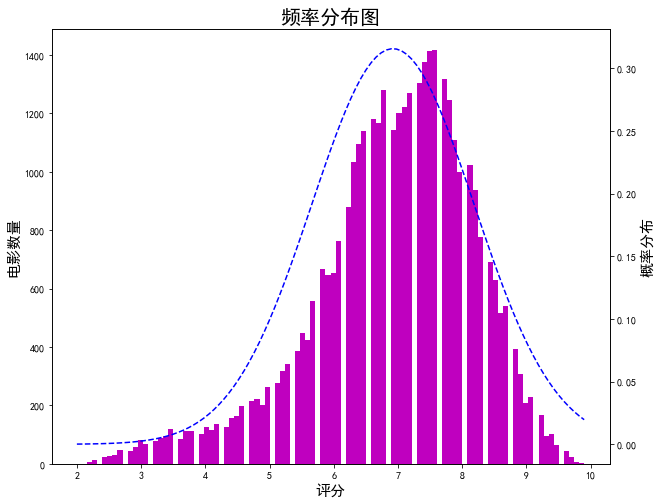

In [10]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(111)
n,bins,patches = ax1.hist(df["评分"],bins = 100, color = 'm')

ax1.set_ylabel("电影数量",fontsize = 15)
ax1.set_xlabel("评分",fontsize = 15)
ax1.set_title("频率分布图",fontsize = 20)

y = norm.pdf(bins,df["评分"].mean(),df["评分"].std())
ax2 = ax1.twinx()
ax2.plot(bins,y,"b--")
ax2.set_ylabel("概率分布",fontsize = 15)
plt.show()

## 5.根据电影时长和电影评分绘制散点图 

用两组数据构成多个坐标点，考察坐标点的分布，判断两变量之间是否存在某种关联或总结坐标点的分布模式。散点图将序列显示为一组点。值由点在图表中的位置表示。类别由图表中的不同标记表示。散点图通常用于比较跨类别的聚合数据。

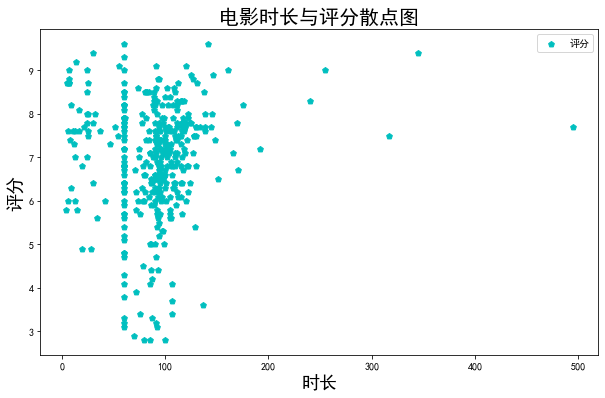

In [12]:
x = df["时长"][::100]
y = df["评分"][::100]

plt.figure(figsize = (10,6))
plt.scatter(x,y,color = 'c',marker = 'p',label = "评分")
plt.legend()
plt.title("电影时长与评分散点图",fontsize = 20)
plt.xlabel("时长",fontsize = 18)
plt.ylabel("评分",fontsize = 18)
plt.show()

**由于我们的数据量过大，所以画出来的图非常冗杂**

**可以发现，大部分的电影时长还是集中在100附近，评分大多在7分左右**

### **marker属性**

设置散点的形状

|**marker**|**description**|**描述**|
|-|-|-|
|"."|point|点|
|","|pixel|像素|
|"o"|circle|圈|
|"v"|triangle_down|倒三角形|
|"^"|triangle_up|正三角形|
|"<"|triangle_left|左三角形|
|">"|triangle_right|右三角形|
|"1"|tri_down|tri_down|
|"2"|tri_up|tri_up|
|"3"|tri_left|tri_left|
|"4"|tri_right|tri_right|
|"8"|octagon|八角形|
|"s"|square|正方形|
|"p"|pentagon|五角|
|"\*"|star|星星|
|"h"|hexagon1|六角1|
|"H"|hexagon2|六角2|
|"+"|plus|加号|
|"x"|x|x号|
|"D"|diamond|钻石|
|"d"|thin_diamon|细钻|
|"\|"|vline|v线|
|"\_"|hline|H线|

## 6.绘制各个地区的评分箱型图

箱型图（Box-plot）又称为盒须图，盒式图或箱型图，是一种用作显示一组数据分散情况资料的统计图。因形状如箱子而得名。在各种领域中也经常被使用，常见于品质管理。它主要用于反映原始数据分布的特征，还可以进行多组数据分布特征的比较。箱线图的绘制方法是：先找出一组数据的中位数，两个四分位数，上下边缘线；然后，连接两个四分位数画出箱子；再将上下边缘线与箱子相连接，中位数在箱子中间。

![test](375d3e018a4a35cde9d3cb178ce43ce.jpg)

**一般计算过程**

（ 1 ）计算上四分位数（ Q3 ），中位数，下四分位数（ Q1 ）

（ 2 ）计算上四分位数和下四分位数之间的差值，即四分位数差（IQR, interquartile range）Q3-Q1

（ 3 ）绘制箱线图的上下范围，上限为上四分位数，下限为下四分位数。在箱子内部中位数的位置绘制横线

（ 4 ）大于上四分位数1.5倍四分位数差的值，或者小于下四分位数1.5倍四分位数差的值，划为异常值（outliers）

（ 5 ）异常值之外，最靠近上边缘和下边缘的两个值处，画横线，作为箱线图的触须

（ 6 ）极端异常值，即超出四分位数差3倍距离的异常值，用实心点表示；较为温和的异常值，即处于1.5倍-3倍四分位数差之间的异常值，用空心点表示

（ 7 ）为箱线图添加名称，数轴等

**参数详解**

```python
plt.boxplot(x,notch=None,sym=None,vert=None,
    whis=None,positions=None,widths=None,
    patch_artist=None,meanline=None,showmeans=None,
    showcaps=None,showbox=None,showfliers=None,
    boxprops=None,labels=None,flierprops=None,
    medianprops=None,meanprops=None,
    capprops=None,whiskerprops=None,)
```
x: 指定要绘制箱线图的数据；

notch: 是否是凹口的形式展现箱线图，默认非凹口；

sym: 指定异常点的形状，默认为+号显示；

vert: 是否需要将箱线图垂直摆放，默认垂直摆放；

whis: 指定上下须与上下四分位的距离，默认为为1.5倍的四分位差；

positions: 指定箱线图的位置，默认为[0,1,2...]；

widths: 指定箱线图的宽度，默认为0.5；

patch_artist: 是否填充箱体的颜色；

meanline:是否用线的形式表示均值，默认用点来表示；

showmeans: 是否显示均值，默认不显示；

showcaps: 是否显示箱线图顶端和末端的两条线，默认显示；

showbox: 是否显示箱线图的箱体，默认显示；

showfliers: 是否显示异常值，默认显示；

boxprops: 设置箱体的属性，如边框色，填充色等；

labels: 为箱线图添加标签，类似于图例的作用；

filerprops: 设置异常值的属性，如异常点的形状、大小、填充色等；

medainprops: 设置中位数的属性，如线的类型、粗细等

meanprops: 设置均值的属性，如点的大小，颜色等；

capprops: 设置箱线图顶端和末端线条的属性，如颜色、粗细等；

whiskerprops: 设置须的属性，如颜色、粗细、线的类型等

### 美国电影评分的箱线图 

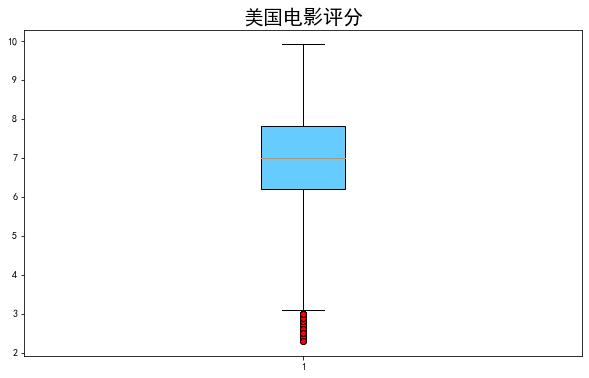

In [29]:
data = df[df.产地 == "美国"]["评分"]

plt.figure(figsize = (10,6))
plt.boxplot(data,whis = 2,flierprops = {"marker":'o',"markerfacecolor":"r","color":'k'}
           ,patch_artist = True, boxprops = {"color":'k',"facecolor":"#66ccff"})
plt.title("美国电影评分",fontsize = 20)
plt.show()

### 多组数据箱线图 

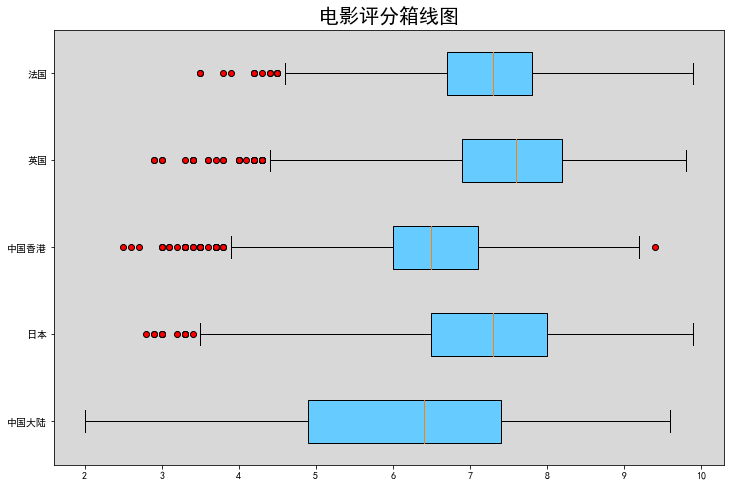

In [32]:
data1 = df[df.产地 == "中国大陆"]["评分"]
data2 = df[df.产地 == "日本"]["评分"]
data3 = df[df.产地 == "中国香港"]["评分"]
data4 = df[df.产地 == "英国"]["评分"]
data5 = df[df.产地 == "法国"]["评分"]

plt.figure(figsize = (12,8))
plt.boxplot([data1,data2,data3,data4,data5],labels = ["中国大陆","日本","中国香港","英国","法国"],
           whis = 2,flierprops = {"marker":'o',"markerfacecolor":"r","color":'k'}
           ,patch_artist = True, boxprops = {"color":'k',"facecolor":"#66ccff"},
           vert = False)

ax = plt.gca() #获取当时的坐标系
ax.patch.set_facecolor("gray") #设置坐标系背景颜色
ax.patch.set_alpha(0.3) #设置背景透明度

plt.title("电影评分箱线图",fontsize = 20)
plt.show()

### 通过vert属性可以把图旋转过来

## 7.相关系数矩阵图--热力图

In [33]:
data = df[["投票人数","评分","时长"]]
data[:5]

,投票人数,评分,时长
0,692795,9.6,142
1,42995,9.5,116
2,327855,9.5,116
3,580897,9.4,142
4,478523,9.4,171


### pandas本身也封装了画图函数 

### 我们可以画出各个属性之间的散点图，对角线是分布图 

Populating the interactive namespace from numpy and matplotlib


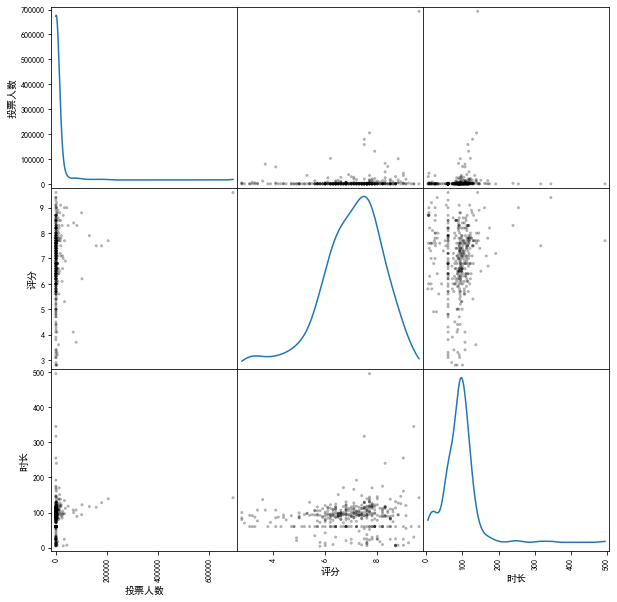

In [37]:
%pylab inline 
result = pd.plotting.scatter_matrix(data[::100],diagonal = "kde",color = 'k',alpha = 0.3,figsize = (10,10)) 

### 现在我们来画电影时长，投票人数，评分的一个相关系数矩阵图

seaborn是一个精简的python库，可以创建具有统计意义的图表，能理解pandas的DataFrame类型。

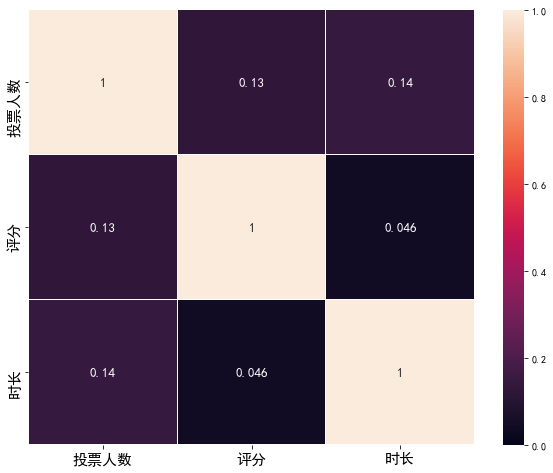

In [43]:
import seaborn as sns

corr = data.corr()
corr = abs(corr)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

ax = sns.heatmap(corr,vmax = 1,vmin = 0,annot = True,annot_kws = {"size":13,"weight":"bold"},linewidths = 0.05)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

### 参数详解 

```python
sns.heatmap(data,vmin=None,vmax=None,cmap=None,center=None,robust=False,annot=None,fmt='.2g',annot_kws=None,linewidths=0,linecolor='white',cbar=True,cbar_kws=None,cbar_ax=None,square=False,xticklabels='auto',yticklabels='auto',mask=None,ax=None,**kwargs,)
```

（ 1 ）热力图输入数据参数：

data:矩阵数据集，可以是numpy的数组（array），也可以是pandas的DataFrame。如果是DataFrame，则df的index/column信息会分别对应到heatmap的columns和rows，即pt.index是热力图的行标，pt.columns是热力图的列标。

（ 2 ）热力图矩阵块颜色参数：

vmax,vmin:分别是热力图的颜色取值最大和最小范围，默认是根据data数据表里的取值确定。cmap:从数字到色彩空间的映射，取值是matplotlib包里的colormap名称或颜色对象，或者表示颜色的列表；改参数默认值：根据center参数设定。center:数据表取值有差异时，设置热力图的色彩中心对齐值；通过设置center值，可以调整生成的图像颜色的整体深浅；设置center数据时，如果有数据溢出，则手动设置的vmax、vmin会自动改变。robust:默认取值False，如果是False，且没设定vmin和vmax的值。

（ 3 ）热力图矩阵块注释参数：

annot(annotate的缩写):默认取值False；如果是True，在热力图每个方格写入数据；如果是矩阵，在热力图每个方格写入该矩阵对应位置数据。fmt:字符串格式代码，矩阵上标识数字的数据格式，比如保留小数点后几位数字。annot_kws:默认取值False；如果是True，设置热力图矩阵上数字的大小颜色字体，matplotlib包text类下的字体设置；

（ 4 ）热力图矩阵块之间间隔及间隔线参数：

linewidth:定义热力图里“表示两两特征关系的矩阵小块”之间的间隔大小。linecolor:切分热力图上每个矩阵小块的线的颜色，默认值是"white"。

（ 5 ）热力图颜色刻度条参数：

cbar:是否在热力图侧边绘制颜色进度条，默认值是True。cbar_kws:热力图侧边绘制颜色刻度条时，相关字体设置，默认值是None。cbar_ax：热力图侧边绘制颜色刻度条时，刻度条位置设置，默认值是None

（ 6 ）

square:设置热力图矩阵小块形状，默认值是False。xticklabels,yticklabels:xticklabels控制每列标签名的输出；yticklabels控制每行标签名的输出。默认值是auto。如果是True，则以DataFrame的列名作为标签名。如果是False，则不添加行标签名。如果是列表，则标签名改为列表中给的内容。如果是整数K，则在图上每隔K个标签进行一次标注。